In [7]:
# import libraries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Setup Complete")

Setup Complete


# Last 5 years of Apple WWDC
from 2022 to 2018

In [8]:
from youtube_transcript_api import YouTubeTranscriptApi

wwdc_2022 = 'q5D55G7Ejs8'
wwdc_2021 = '0TD96VTf0Xs'
wwdc_2020 = 'GEZhD3J89ZE'
wwdc_2019 = 'psL_5RIBqnY'
wwdc_2018 = 'UThGcWBIMpU'


trans_2022 = YouTubeTranscriptApi.get_transcript(wwdc_2022, languages=['en'])
trans_2021 = YouTubeTranscriptApi.get_transcript(wwdc_2021, languages=['en'])
trans_2020 = YouTubeTranscriptApi.get_transcript(wwdc_2020, languages=['en'])
trans_2019 = YouTubeTranscriptApi.get_transcript(wwdc_2019, languages=['en'])
trans_2018 = YouTubeTranscriptApi.get_transcript(wwdc_2018, languages=['en'])


In [9]:
# take a look at each transcript
print(trans_2022[-1])
print(trans_2021[-1])
print(trans_2020[-1])
print(trans_2019[-1])
print(trans_2018[-1])


{'text': '.', 'start': 6519.62, 'duration': 8.008}
{'text': 'you', 'start': 6408.56, 'duration': 2.079}
{'text': '[song fades]', 'start': 6479.446, 'duration': 1.602}
{'text': '(Music playing)', 'start': 8210.333, 'duration': 3.933}
{'text': '[ Applause ]', 'start': 8127.485, 'duration': 4.071}


In [10]:
# write transcript into txt file
files = ['wwdc_2022.txt','wwdc_2021.txt','wwdc_2020.txt','wwdc_2019.txt','wwdc_2018.txt']
trans = [trans_2022, trans_2021,trans_2020,trans_2019,trans_2018]

for n in range(5):
    with open(f'{files[n]}', 'w') as file:
        for i in trans[n]:
            file.write(f'{i}\n')

In [11]:
# turn transcripts to lists

list_2022 = []
list_2021 = []
list_2020 = []
list_2019 = []
list_2018 = []
num = 22
list_total = []
for i in range(5):
    temp  = []
    for j in range(len(trans[i])):
        temp.append(trans[i][j].get('text'))
    list_total.append(temp)

list_2022 = list_total[0]
list_2021 = list_total[1]
list_2020 = list_total[2]
list_2019 = list_total[3]
list_2018 = list_total[4]

In [12]:
print(list_2022[-1])
print(list_2021[-1])
print(list_2020[-1])
print(list_2019[-1])
print(list_2018[-1])

.
you
[song fades]
(Music playing)
[ Applause ]


In [13]:
lists = [list_2022,list_2021,list_2020,list_2019,list_2018]
yr = 2022
for l in lists:
    
    print(f'Year: {yr}, Length: {len(l)}')
    yr -= 1

Year: 2022, Length: 1819
Year: 2021, Length: 2879
Year: 2020, Length: 2061
Year: 2019, Length: 2737
Year: 2018, Length: 4114


## remove non speech word

In [14]:
# remove non speech word such as [Music]
non_speech = ['(Music playing)','[ Applause ]','[Music]','[song fades]','(Applause)','[ Music ]']

for l in lists:
    l[:] = (val for val in l if val not in non_speech)

In [15]:
# check length of each year event after removing 
yr = 2022
for l in lists:
    
    print(f'Year: {yr}, Length: {len(l)}')
    yr -= 1

Year: 2022, Length: 1819
Year: 2021, Length: 2854
Year: 2020, Length: 2060
Year: 2019, Length: 2557
Year: 2018, Length: 3999


In [16]:
print(list_2019[50:70])

["Now, while the service\ndoesn't launch until fall,", 'we thought it would be\nreally fun this morning to', 'share with you a sneak\npeek of just one of our', 'upcoming show from Ron\nMoore, the executive', 'producer behind Battle\nStar Galactica and Star Trek.', 'With his new series, Ron\nwanted to take us on a', 'journey in which the\nspace race was a little', 'different than you\nmight remember it.', 'And it has never ended.', "So, let's take a first\nlook at For All Mankind.", '>> MALE SPEAKER: I believe\nthat this nation should', 'commit itself to landing\na man on the moon and', 'returning him\nsafely to the earth.', '>> MALE SPEAKER: After\nthousands of years gazing', 'up in the heavens and\ndreaming of this day, a', 'man is about to set\nfoot on the moon.', '>> MALE SPEAKER: Across\nthe world, people wait', 'with bated breath.', '>> MALE SPEAKER:\nLadies and gentlemen,', 'this is a live signal.']


now we need to replace '\n' with ' '

In [17]:
for l in lists:
    for i in l:
        # replace all '\n' to ' '
        i = i.replace('\n', ' ')

In [18]:
str_list  = []

for i in range(5):
    temp_str  = ' '.join(lists[i])
    str_list.append((temp_str.lower()))
    print(len(temp_str))

89762
94551
99661
102006
106072


## remove stopwords

In [19]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
stopwords = set(STOPWORDS)

In [20]:
one_word_list = []
for s in str_list:
    temp_word_list = s.split()
    one_word_list.append(temp_word_list)

print(one_word_list[0][:50])

['♪', '♪', '♪', '♪', '♪', '♪', '♪', '♪', 'tim', 'cook:', 'good', 'morning,', 'and', 'welcome', 'to', 'wwdc.', 'we', 'have', 'a', 'big', 'day', 'of', 'announcements', 'about', 'our', 'latest', 'technologies', 'and', 'platforms.', 'these', 'platforms,', 'and', 'the', 'products', 'they', 'drive,', 'deliver', 'amazing', 'experiences', 'for', 'our', 'users', 'and', 'provide', 'developers', 'with', 'incredible', 'opportunities', 'so', 'they']


In [21]:
# apply stopwords 

stopwords.add('♪')
stopwords.add('and')
stopwords.add('i')
stopwords.add('')

for word in one_word_list:
    word[:] = [i for i in word if i not in stopwords]
    print(len(word))

8445
8930
9304
9978
9997


In [22]:
# take a look at filtered words
print(one_word_list[0][:15])

['tim', 'cook:', 'good', 'morning,', 'welcome', 'wwdc.', 'big', 'day', 'announcements', 'latest', 'technologies', 'platforms.', 'platforms,', 'products', 'drive,']


In [23]:
# replace punctuation mark with ''
import re
for word in one_word_list:
    word[:] = [re.sub(r'[^\w\s]', '', i) for i in word]

In [24]:
print(one_word_list[0][:15])

['tim', 'cook', 'good', 'morning', 'welcome', 'wwdc', 'big', 'day', 'announcements', 'latest', 'technologies', 'platforms', 'platforms', 'products', 'drive']


In [25]:
# put list of text back to string for wordcloud

for i in range(5):
    str_list[i] = ' '.join(one_word_list[i])
print(str_list[0][:15])

tim cook good m


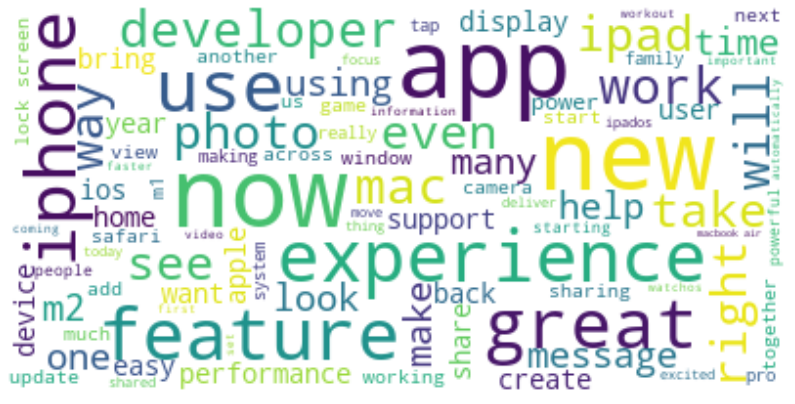

In [26]:
wordcloud = WordCloud(max_font_size=50, max_words=90, background_color="white").generate(str_list[0])
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud for transcript from 2018 to 2022

In [48]:
# add masking colors based on mask image
from PIL import Image
from wordcloud import ImageColorGenerator

In [50]:
apple_logo = "./png-apple-logo-9735.png"
mask = np.array(Image.open(apple_logo))

total_2018_to_2022 = str_list[0]+str_list[1]+str_list[2]+str_list[3]+str_list[4]

In [51]:

total_wordcloud = WordCloud(max_words=1500,
                            height=mask.shape[0],
                            width=mask.shape[1],
                            mask = mask,
                            colormap='PuRd',
                            contour_width=3,
                            contour_color='firebrick',
                            background_color='white').generate(total_2018_to_2022)
plt.figure(figsize=(40, 30))
plt.imshow(total_wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


### Top 20 Frequent words in WWDC 2022

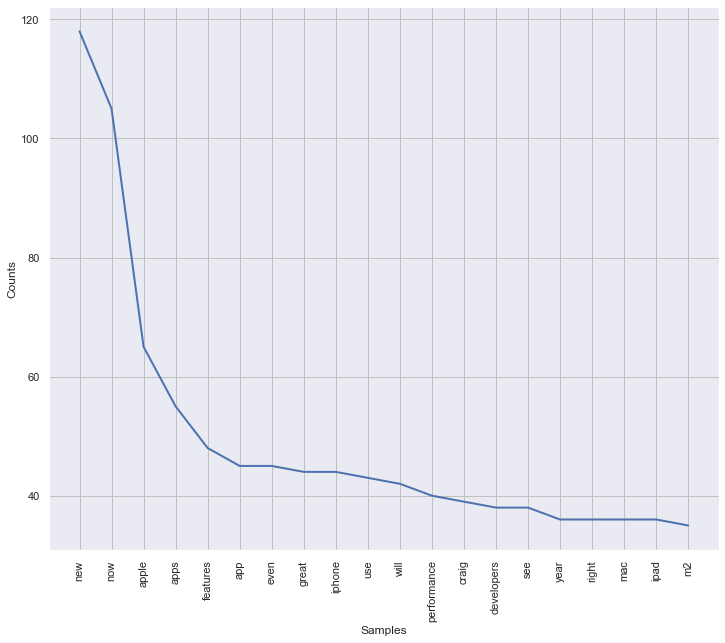

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
import nltk
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style( 'darkgrid')
nlp_words = nltk.FreqDist(one_word_list[0])
nlp_words.plot(20)

### Top 5 Frequent words in WWDC from 2018 to 2022

In [28]:
yr = 2022
for i in range(5):
    nlp_words = nltk.FreqDist(one_word_list[i])
    print(f'In WWDC {yr} the top 5 words are: {nlp_words.most_common(5)}')
    yr -= 1


In WWDC 2022 the top 5 words are: [('new', 118), ('now', 105), ('apple', 65), ('apps', 55), ('features', 48)]
In WWDC 2021 the top 5 words are: [('new', 166), ('now', 95), ('app', 83), ('apple', 78), ('even', 71)]
In WWDC 2020 the top 5 words are: [('new', 143), ('app', 113), ('now', 112), ('apple', 102), ('apps', 99)]
In WWDC 2019 the top 5 words are: [('now', 247), ('', 144), ('new', 135), ('so', 98), ('great', 77)]
In WWDC 2018 the top 5 words are: [('now', 230), ('', 105), ('new', 96), ('apple', 85), ('app', 82)]


### How many times did the word "m2" appear in WWDC 2022?

In [29]:
nlp_words = nltk.FreqDist(one_word_list[0])
m2 = nlp_words.freq('m2') * len(one_word_list[0])
print(m2)

35.0


### Term Frequency Inverse Document Frequency(TF-IDF)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# lists = [list_2022,list_2021,list_2020,list_2019,list_2018]
# _ in range(5):
    #for j in range(lists):
        #for l in j:
             #vectorizer = TfidfVectorizer()
             #X = vectorizer.fit_transform(l)


### Sentiment analysis
Does WWDC's polarity and subjectivity changes over years?

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andycheung/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:

polarity = []
for l in lists:
    temp = []
    for sentence in l:
        sid = SentimentIntensityAnalyzer()
        ss = sid.polarity_scores(sentence)
        temp.append(ss)
    polarity.append(temp)

In [34]:
#print(polarity[0])

In [35]:
print(len(polarity))
print(len(polarity[0]))
print(len(polarity[0][0]))

5
1819
4


In [36]:
# now loop through each list of dic
polar_score =  []
for year in polarity:
    temp = []
    for sent_polar in year:
        temp.append([val for val in sent_polar.values()])
    polar_score.append(temp)

In [37]:
# order of scores are 'neg', 'neu', 'pos', 'compound'
print(polar_score[0][:5])

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.504, 0.496, 0.7096]]


In [38]:
#avg_polar_score = []
neg = []
neu = []
pos = []
com = []
for scores in polar_score:
    temp_neg = []
    temp_neu = []
    temp_pos = []
    temp_com = []
    for score in scores:
        temp_neg.append(score[0])
        temp_neu.append(score[1])
        temp_pos.append(score[2])
        temp_com.append(score[3])
    neg.append(temp_neg)
    neu.append(temp_neu)
    pos.append(temp_pos)
    com.append(temp_com)

In [39]:
avg_polar = [neg,neu,pos,com]

In [40]:
print(np.mean(neg[0]))
print(np.mean(pos[0]))

0.011071467839472236
0.13280318856514567


In [41]:
print(len(neg))

5


In [42]:
# average polar score over years

for year in range(avg_polar):
    temp = []
    for scores in year:


SyntaxError: unexpected EOF while parsing (<ipython-input-42-3a01a8cfca6e>, line 5)